# Seasonal coffee leaf rust propagation

## Impulsive model definition

We consider the impulsive mathematical model for the propagation of the CLR in the coffee plantation. The latter is described by the dynamics of fungus during the production season (i.e. rainy season for some countries) through ordinary differential equations; and during the non-production period (i.e. dry season for some countries) represented by the impulsive effect. The model describes the evolution of susceptible branches $S$, infected branches $I$, urediniospores $U$ and berries $B$, and is given by dynamics

$$
\left\{ 
\begin{aligned}
&\dot{S}=\Lambda -\frac{\omega\nu U}{N}S -\mu S, \;t \neq nT; \\
&\dot{I}=\frac{\omega\nu U}{N}S -(\mu +d)I,  \; t \neq nT; \\
&\dot{U}=\gamma I -(\nu+\mu_{U})U-v,  \; t \neq nT; \\
&\dot B = \delta_S S + \delta_I I - \mu_B B,  \; t \neq nT;\\
&S(nT^+)=\varphi_S S(nT);  \\
&I(nT^+)=\varphi_I I(nT);  \\
&U(nT^+)=\varphi_U U(nT);\\
&B(nT^+)=0;
\end{aligned}
\right.
$$

where $N(t)=S(t)+I(t)$ represents the total number of branches at time $t$, and $v$ is the inoculative biological control (e.g. a mycoparasite capable of consuming the urediniospores). Initial conditions are fixed $S(0)=S_0>0$, $I(0)=I_0 \geq 0$, $U(0)=U_0 \geq 0$, $B(0) = B_0 > 0$. The cost function to maximize is the profit for a time period $[0,kT]$, given by 

$$
    J(v) = \alpha_B \sum_{j=1}^k B(jT) - \alpha_v \int_0^{kT} v \, dt = \int_{0}^{kT} \Big( \alpha_B(\delta_S S + \delta_I I - \mu_B B) - \alpha_v v \Big) \, dt,
$$

where $\alpha_B$ and $\alpha_v$ are the market prices per coffee grain and per spore, respectively.

## Model in continuous form

The latter problem can be rewritten in the continuous form by defining $k$ set of states $x_n = (S_n,I_n,U_n,B_n)$ and $k$ controls $v_n(t)$, with dynamics defined for $t \in [0,T]$ as

$$
\left\{ 
\begin{aligned}
&\dot{S_n}=\Lambda -\omega\nu U_n\frac{S_n}{S_n + I_n} -\mu S_n, \\
&\dot{I_n}=\omega\nu U_n\frac{S_n}{S_n + I_n} -(\mu +d)I_n, \\
&\dot{U_n}=\gamma I_n -(\nu+\mu_{U})U_n - v_n,  \\
&\dot B_n = \delta_S S_n + \delta_I I_n - \mu_B B_n,
\end{aligned}
\right.
$$

for $n = 1, \dots, k$, with boundary conditions

$$
\left\{
\begin{aligned}
& S_1(0)=S_0>0, \; I_1(0)=I_0 \geq 0, \\ & U_1(0)=U_0 \geq 0, \; B_1(0) = B_0 > 0, \\
& S_{n+1}(0)=\varphi_s S_n(T), \; I_{n+1}(0)=\varphi_I I_n(T), \\
& U_{n+1}(0)=\varphi_U U_n(T), \; B_{n+1}(0)= 0,
\end{aligned}
\right.
$$

for $n = 1, \dots, k-1$. Then, the cost function becomes

$$
    J_c(v_1, \dots, v_k) = \alpha_B \sum_{n=0}^k B_n(T) - \alpha_v \sum_{n=0}^k \int_0^{T} v_n \, dt.
$$

<font color=white>[Thumbnail](thumbnail.png)</font>

In [1]:
!pygmentize problem.cpp

// +++DRAFT+++ This class implements the OCP functions
// It derives from the generic class bocop3OCPBase
// OCP functions are defined with templates since they will be called
// from both the NLP solver (double arguments) and AD tool (ad_double arguments)
//#pragma once

#include <OCP.h>

template <typename Variable>
void OCP::finalCost(double initial_time, double final_time, const Variable *initial_state, const Variable *final_state, const Variable *parameters, const double *constants, Variable &final_cost)
{
  	int t;
	final_cost = 0;
	
	double prix  = constants[13];

    for( t = 0; t < 4; t = t + 1 ){
		int q = t*5;

		final_cost = final_cost - final_state[3 + q] + prix*final_state[4 + q];
	}
}

template <typename Variable>
void OCP::dynamics(double time, const Variable *state, const Variable *control, const Variable *parameters, const double *constants, Variable *state_dynamics)
{	
	int t;
    	
	double Lam    = constants[0];
	double ome    = constants[1];
	double gam    = consta

In [2]:
%matplotlib inline
import bocop
import os,shutil
import matplotlib.pyplot as plt

In [3]:
problem_path = "." # using local problem definition
bocop.build(problem_path, cmake_options = '-DCMAKE_CXX_COMPILER=g++')

[EXEC] > ['cmake -DCMAKE_BUILD_TYPE=Debug -DPROBLEM_DIR=/opt/ct-gallery/gallery/examples/clr -DCPP_FILE=problem.cpp  -DCMAKE_CXX_COMPILER=g++  /opt/ct-gallery/env/lib/python3.7/site-packages/bocop']
>	-- The C compiler identification is GNU 7.5.0
>	-- The CXX compiler identification is GNU 10.2.0
>	-- Detecting C compiler ABI info
>	-- Detecting C compiler ABI info - done
>	-- Check for working C compiler: /opt/ct-gallery/env/bin/x86_64-conda-linux-gnu-cc - skipped
>	-- Detecting C compile features
>	-- Detecting C compile features - done
>	-- Detecting CXX compiler ABI info
>	-- Detecting CXX compiler ABI info - done
>	-- Check for working CXX compiler: /usr/bin/g++ - skipped
>	-- Detecting CXX compile features
>	-- Detecting CXX compile features - done
>	-- Problem path: /opt/ct-gallery/gallery/examples/clr
>	-- Using CPPAD found at /opt/ct-gallery/env/include/cppad/..
>	-- Using IPOPT found at /opt/ct-gallery/env/lib/libipopt.so
>	-- Found Python3: /opt/ct-gallery/env/bin/python3.7 

0

In [4]:
files = ['control', 'nocontrol']

for file in files:
    shutil.copyfile(problem_path + "/" + file + '.def', problem_path + "/" + 'problem.def')
    bocop.run(problem_path, graph=0)
    os.rename("problem.sol",file + '.sol')

Executing bocop ... 
Done
Executing bocop ... 
Done


Loading solution:  ./control.sol
Loading solution:  ./nocontrol.sol


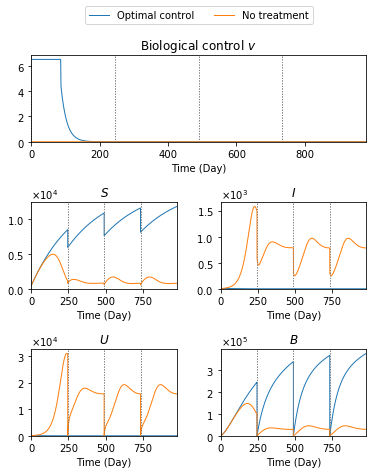

In [5]:
import numpy as np
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 

label = ['Optimal control','No treatment']
files = ['control', 'nocontrol']
v = [[],[]]

q = 4 # Number of periods simulated
states = 5 # Number of states
names = ['Biological control $v$','$S$','$I$','$U$','$B$','$c$']

plt.figure(figsize=(6,7))
plt.subplot(321)
plt.subplots_adjust(hspace=0.7, wspace=0.3)

for o in range(0,len(files)):
    solution = bocop.readSolution(problem_path + "/" + files[o] + ".sol")
    t = solution.time_steps; period = t[-1]; tt = []

    # Construct the real time interval
    for i in range(0,q):
        tt.append(t + i*period)
    t = np.hstack(tt)
    t0 = t[0]; t1 = t[-1]

    tmp = []
    for i in range(0,q):
        tmp.append(solution.control[i])
        tmp.append(0)
    v[o].append(np.hstack(tmp))

    for i in range(0,q):
        tmp = []
        for p in range(0,states-1):
            tmp.append(solution.state[p*states + i])
        v[o].append(np.hstack(tmp))

for i in range(0,5):
        if i == 0:
            plt.subplot(311) # Control plot is bigger
        else:
            plt.subplot(322 + i)
        ax = plt.gca()
        plt.title(names[i])
        plt.xlabel('Time (Day)')
        ax.set_xlim(t0,t1)
        plt.plot([t0,t1], [np.max(v[o][0]), np.max(v[o][0])], linestyle=':', color='grey', linewidth=1)
        plt.plot([t0,t1], [np.min(v[o][0]), np.min(v[o][0])], linestyle=':', color='grey', linewidth=1)
        
        for o in range(0,len(files)):
            curve = v[o][i]
            plt.plot(t,curve,linewidth=1,label=label[o])

            for j in range(0,q):
                plt.axvline(x=period*j, linestyle=':', color='grey', linewidth = 1)
                
        lim = ax.get_ylim()
        ax.set_ylim((0,lim[1]))
        ax.yaxis.set_major_formatter(formatter)
        
        if i == 0: plt.legend(bbox_to_anchor=(0, 1.3, 1, 0), loc="lower center", ncol=2)

plt.show()